# Section2：学習率最適化手法

## 勾配降下法

ランダムに抽出したサンプルの誤差 \
誤差をパラメータで微分したものと学習率の積を減算する。

学習率：$\varepsilon$
\begin{aligned}
w^{(t+1)} = w^{(t)} - \varepsilon \nabla E
\end{aligned}

- メリット 
 - データが冗⻑な場合の計算コストの軽減
 - 望まない局所極小解に収束するリスクの軽減
 - オンライン学習ができる

## モメンタム
- 誤差をパラメータで微分したものと学習率の積を減算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する

学習率：$\varepsilon$ \
慣性：$\mu$

\begin{aligned}
V_t &= \mu V_{t-1} - \varepsilon \nabla E \\[8px]
w^{(t+1)} &= w^{(t)} - V_t
\end{aligned}


- メリット
 - 局所的最適解にはならず、大域的最適解となる。
 - 谷間についてから最も低い位置(最適値)にいくまでの時間が早い。

## AdaGrad
誤差をパラメータで微分したものと再定義した学習率の積を減算する

任意な値:$\theta$

\begin{aligned}
h_0 &= \theta \\[8px]
h_t &= h_{t-1} + (\nabla E)^2 \\[8px]
w^{(t+1)} &= w^{(t)} - \varepsilon \frac{1}{\sqrt{h_t}+\theta} \nabla E
\end{aligned}

- メリット
 - 勾配の緩やかな斜面に対して、最適値に近づける

### 課題
学習率が徐々に小さくなるので、鞍点問題を引き起こす事があった。

## RMSProp
誤差をパラメータで微分したものと再定義した学習率の積を減算する

0～1の値で昔の勾配情報をどの程度使うか：$\alpha$ \
$\alpha$が小さくなると、昔の勾配情報を無視する

\begin{aligned}
h_t &= \alpha h_{t-1} + (1 -\alpha)(\nabla E)^2 \\[8px]
w^{(t+1)} &= w^{(t)} - \varepsilon \frac{1}{\sqrt{h_t}+\theta} \nabla E
\end{aligned}

- メリット
 - 局所的最適解にはならず、大域的最適解となる。
 - ハイパーパラメータの調整が必要な場合が少ない

## Adam
- モメンタムの、過去の勾配の指数関数的減衰平均
- RMSPropの、過去の勾配の2乗の指数関数的減衰平均 \
上記をそれぞれ孕んだ最適化アルゴリズムである。


- メリット
 - モメンタムおよびRMSPropのメリットを孕んだアルゴリズムである。

#### ゼロから作るディープラーニング　6.1.3 SGDの欠点

SGDは、勾配が下図のようにジグザグな動きをします。これはかなり非効率な経路です。SGDの非効率な探索経路の根本的な原因は、勾配の方向が本来の最小値ではない方向を指していることに起因します。

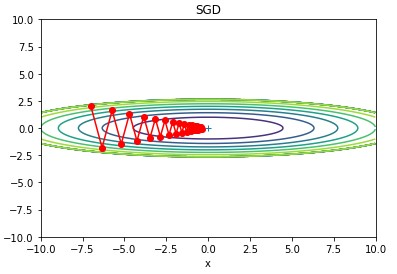

In [1]:
from IPython.display import Image
Image("./Section2_01_SGD.jpg")

#### ゼロから作るディープラーニング　6.1.4 Momentum

モーメンタム（Momentum）とは「運動量」という意味の言葉で、物理に関係があります。
下の図で示されるように、更新経路は、ボールがお椀を転がるような動きをします。SGDと比べると”ジグザグ度合い”が軽減されていることがわかります。。これは$x$軸方向に受ける力はとても小さいですが、常に同じ方向の力を受けるため、同じ方向へ一定して加速することになるからです。逆に、$y$軸方向には受ける力は大きいですが、正と負の方向の知らかを交互に受けるため、それらが互いに打ち消しあい、$y$軸方向の速度は安定しません。それによって、SGDのときと比べて$x$軸方向へ早く近づくことができ、ジグザグの動きを軽減することができます。

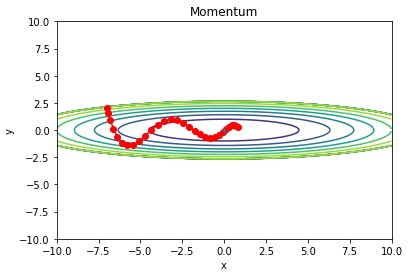

In [2]:
Image("./Section2_02_Momentum.jpg")

#### ゼロから作るディープラーニング　6.1.5 AdaGrad

ニューラルネットワークの学習では、学習係数が小さすぎると学習に時間がかかりすぎてしまい、逆に大きすぎると発散して正しい学習が行えません。 \
学習係数に関する有効なテクニックとして、学習係数の減衰という方法があります。これは学習が進むにつれて、学習係数を小さくするという方法です。最初は大きく学習し、次第に小さく学習するという手法です。 \
AdaGradは、「一つひとつ」のパラメータに対して、”オーダーメイド”の値をこしらえます。 \
AdaGradは、パラメータの要素ごとに適用的に学習係数を調整しながら学習を行う手法です。

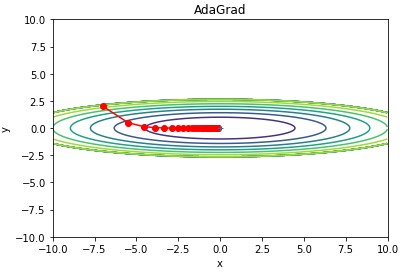

In [3]:
Image("./Section2_03_AdaGrad.jpg")

#### ゼロから作るディープラーニング　6.1.6 Adam

Momentumは、ボールがお椀を転がるように物理法則に準じる動きをしました。AdaGradは、パラメータの要素ごとに、適応的に更新ステップを調整しました。それでは、２つの手法（MomentumはとAdaGradは）を融合したのが、Adamという手法のベースとなるアイデアです。

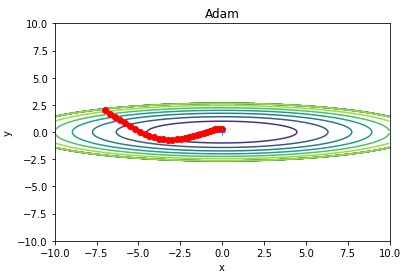

In [4]:
Image("./Section2_04_Adam.jpg")

# プログラムの実装

## SGD
活性化関数：シグモイド関数 \
重みの初期値：0.01 \
バッチ正規化：OFF

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.14
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.1
                : 400. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.12
                : 600. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.14
                : 800. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.09
                : 1000. 正答率(テスト) = 0.1135


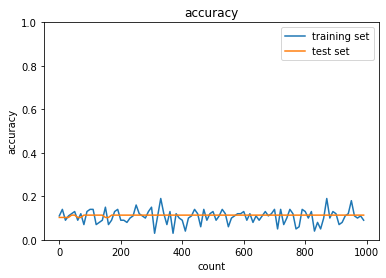

In [10]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="upper right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## SGD
活性化関数：シグモイド関数 \
重みの初期値：0.01 \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.41
                : 200. 正答率(テスト) = 0.4312
Generation: 400. 正答率(トレーニング) = 0.55
                : 400. 正答率(テスト) = 0.5328
Generation: 600. 正答率(トレーニング) = 0.61
                : 600. 正答率(テスト) = 0.6002
Generation: 800. 正答率(トレーニング) = 0.65
                : 800. 正答率(テスト) = 0.6637
Generation: 1000. 正答率(トレーニング) = 0.74
                : 1000. 正答率(テスト) = 0.7117


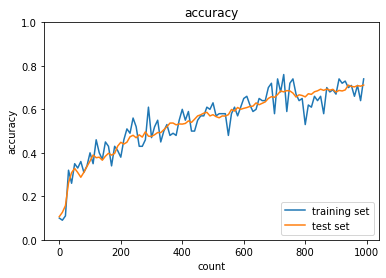

In [12]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## SGD
活性化関数：ReLU \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.84
                : 200. 正答率(テスト) = 0.762
Generation: 400. 正答率(トレーニング) = 0.88
                : 400. 正答率(テスト) = 0.8493
Generation: 600. 正答率(トレーニング) = 0.85
                : 600. 正答率(テスト) = 0.8784
Generation: 800. 正答率(トレーニング) = 0.89
                : 800. 正答率(テスト) = 0.8922
Generation: 1000. 正答率(トレーニング) = 0.96
                : 1000. 正答率(テスト) = 0.9036


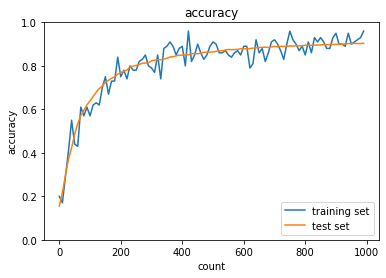

In [13]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from common.multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="HE",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum
活性化関数：シグモイド関数 \
重みの初期値：0.01 \
バッチ正規化：OFF

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.07
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.12
                : 400. 正答率(テスト) = 0.098
Generation: 600. 正答率(トレーニング) = 0.09
                : 600. 正答率(テスト) = 0.1028
Generation: 800. 正答率(トレーニング) = 0.12
                : 800. 正答率(テスト) = 0.101
Generation: 1000. 正答率(トレーニング) = 0.16
                : 1000. 正答率(テスト) = 0.1135


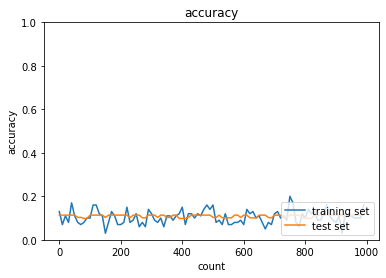

In [9]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="upper right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Momentum
活性化関数：ReLU関数 \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.9
                : 200. 正答率(テスト) = 0.9147
Generation: 400. 正答率(トレーニング) = 0.92
                : 400. 正答率(テスト) = 0.9348
Generation: 600. 正答率(トレーニング) = 0.99
                : 600. 正答率(テスト) = 0.9419
Generation: 800. 正答率(トレーニング) = 0.98
                : 800. 正答率(テスト) = 0.9486
Generation: 1000. 正答率(トレーニング) = 0.94
                : 1000. 正答率(テスト) = 0.9536


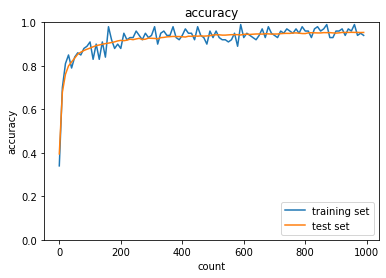

In [19]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad
活性化関数：シグモイド関数 \
重みの初期値：0.01 \
バッチ正規化：OFF

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.11
                : 200. 正答率(テスト) = 0.1009
Generation: 400. 正答率(トレーニング) = 0.09
                : 400. 正答率(テスト) = 0.0958
Generation: 600. 正答率(トレーニング) = 0.16
                : 600. 正答率(テスト) = 0.0982
Generation: 800. 正答率(トレーニング) = 0.1
                : 800. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.11
                : 1000. 正答率(テスト) = 0.1135


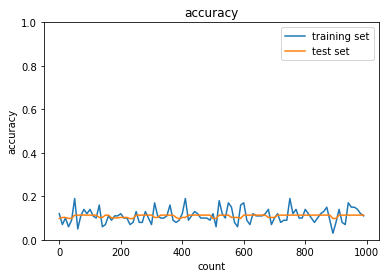

In [17]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="upper right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## AdaGrad
活性化関数：ReLU関数 \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.91
                : 200. 正答率(テスト) = 0.904
Generation: 400. 正答率(トレーニング) = 0.94
                : 400. 正答率(テスト) = 0.9305
Generation: 600. 正答率(トレーニング) = 0.98
                : 600. 正答率(テスト) = 0.9382
Generation: 800. 正答率(トレーニング) = 0.97
                : 800. 正答率(テスト) = 0.9452
Generation: 1000. 正答率(トレーニング) = 0.97
                : 1000. 正答率(テスト) = 0.9509


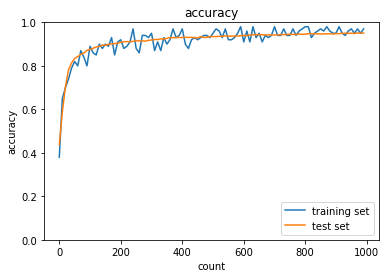

In [20]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RSMprop
活性化関数：ReLU関数 \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.99
                : 200. 正答率(テスト) = 0.9377
Generation: 400. 正答率(トレーニング) = 0.99
                : 400. 正答率(テスト) = 0.9504
Generation: 600. 正答率(トレーニング) = 1.0
                : 600. 正答率(テスト) = 0.9601
Generation: 800. 正答率(トレーニング) = 0.99
                : 800. 正答率(テスト) = 0.9592
Generation: 1000. 正答率(トレーニング) = 0.99
                : 1000. 正答率(テスト) = 0.9616


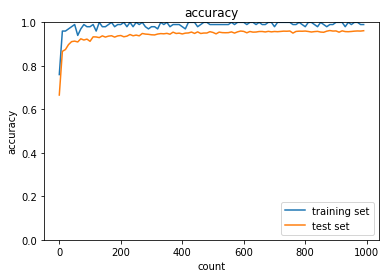

In [21]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## RSMprop （学習率を0.01　⇒　0.1へ変更）
活性化関数：ReLU関数 \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.98
                : 200. 正答率(テスト) = 0.9265
Generation: 400. 正答率(トレーニング) = 0.99
                : 400. 正答率(テスト) = 0.947
Generation: 600. 正答率(トレーニング) = 1.0
                : 600. 正答率(テスト) = 0.9467
Generation: 800. 正答率(トレーニング) = 0.99
                : 800. 正答率(テスト) = 0.9581
Generation: 1000. 正答率(トレーニング) = 0.99
                : 1000. 正答率(テスト) = 0.9593


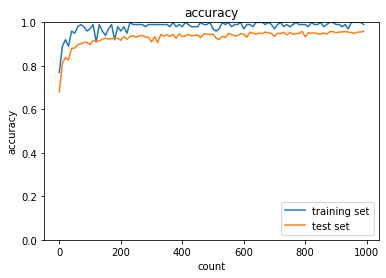

In [23]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

#### 学習率を0.01　⇒　0.1　へ変更したことによって、収束するまでのスピードが落ちた

## Adam
活性化関数：ReLU関数 \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.88
                : 200. 正答率(テスト) = 0.9357
Generation: 400. 正答率(トレーニング) = 0.96
                : 400. 正答率(テスト) = 0.9433
Generation: 600. 正答率(トレーニング) = 0.97
                : 600. 正答率(テスト) = 0.9521
Generation: 800. 正答率(トレーニング) = 0.96
                : 800. 正答率(テスト) = 0.9558
Generation: 1000. 正答率(トレーニング) = 0.98
                : 1000. 正答率(テスト) = 0.9608


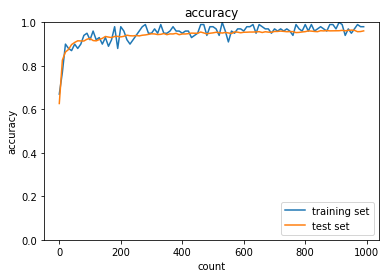

In [24]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Adam （学習率を0.01　⇒　0.1へ変更）
活性化関数：ReLU関数 \
重みの初期値：He \
バッチ正規化：ON

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.96
                : 200. 正答率(テスト) = 0.937
Generation: 400. 正答率(トレーニング) = 0.95
                : 400. 正答率(テスト) = 0.943
Generation: 600. 正答率(トレーニング) = 0.95
                : 600. 正答率(テスト) = 0.9457
Generation: 800. 正答率(トレーニング) = 0.98
                : 800. 正答率(テスト) = 0.9495
Generation: 1000. 正答率(トレーニング) = 0.95
                : 1000. 正答率(テスト) = 0.9589


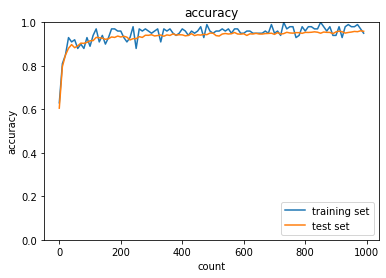

In [25]:

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std="He",
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        # ログ出力は２００回に１回に変更
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

#### 学習率を0.01　⇒　0.1　へ変更したことによって、収束するまでのスピードが上がった（２００回目までの学習のばらつきが少ない）
#### RSMPropと比べて、過学習を抑制できている。

# 確認テスト

#### P44

問）モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。

答） 
- モメンタム
 - 局所的最適解にはならず、大域的最適解となる。
- AdaGrad 
 - 勾配の緩やかな斜面に対して、最適値に近づける。
 - 鞍点問題を引き起こす事がある。
- RMSProp
 - 局所的最適解にはならず、大域的最適解となる。
 - ハイパーパラメータの調整が必要な場合が少ない。